## 1. Data extraction

### 1.1 download data

In [20]:
import os
import urllib.request
import zipfile

dataset_url = 'https://storage.googleapis.com/applied-dl/heart.csv'
dataset_path = os.path.join('./', 'heart.csv')
urllib.request.urlretrieve(dataset_url,dataset_path)

('./heart.csv', <http.client.HTTPMessage at 0x21919849ac8>)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [22]:
df = pd.read_csv("E:/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB
None


### 1.2 data description 

The code uses a small data set provided by the Cleveland Clinic Heart Foundation.

There are hundreds of rows in the CSV, each row describes a patient, and each column describes an attribute.

Use this information to predict whether the patient has heart disease, which is a binary classification task in this dataset.

The following is a description of this data set：

1. age - age in years

2. sex - (1 = male; 0 = female)

3. cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

5. chol - serum cholestoral in mg/dl

6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7. restecg - resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    -   2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

11. slope - the slope of the peak exercise ST segment

12. ca - number of major vessels (0-3) colored by flourosopy

13. thal - thalium stress result

14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

The quesiton that I intend to answer is which factor or character is the most likely to effect the heart disease?

## 2. Data cleanup

In [24]:
# check the missing value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [25]:
# delete the repeating data 
df = df.drop_duplicates()

In [26]:
df['thal'].unique()

array(['fixed', 'normal', 'reversible', '1', '2'], dtype=object)

In [27]:
thal_dict = {
    "fixed": 3,
    "normal":4,
    "reversible":5,
    "1":1,
    "2":2
}
df["thal"] = df["thal"].replace(thal_dict)

## 3. Data visualization

In [28]:
df.target.value_counts()

0    220
1     83
Name: target, dtype: int64

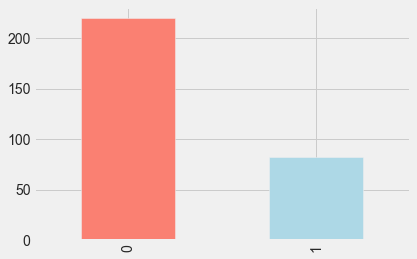

In [29]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [30]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 51 45 39 68 47 35 29 70 46 77 38 34 74 76 71]
sex : [1 0]
cp : [1 4 3 2 0]
trestbps : [145 160 120 130 140 172 150 110 132 117 135 155 125 104 180 138 108 128
 100 200 124  94 122 170 105 165 112 102 152 115 118 101 126 142 174 134
 148 178 158 192 129 144 123 136 146 106 156 154 114 164]
chol : [233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275
 266 211 283 284 224 206 219 340 226 247 167 230 335 234 177 276 353 243
 225 269 267 248 197 360 258 308 245 270 208 264 321 274 325 235 257 302
 164 231 141 252 255 183 330 222 217 282 288 220 209 227 261 213 174 281
 198 221 205 309 240 289 318 298 265 564 246 322 299 300 293 277 304 214
 207 160 249 394 212 184 315 409 244 305 195 196 273 126 313 259 200 262
 215 228 193 303 271 210 327 149 201 295 306 178 237 218 223 242 319 166
 180 311 278 232 253 342 169 187 157 176 241 131 175 417 290 172 216 188
 185 326 260 182 307 186 341 407]

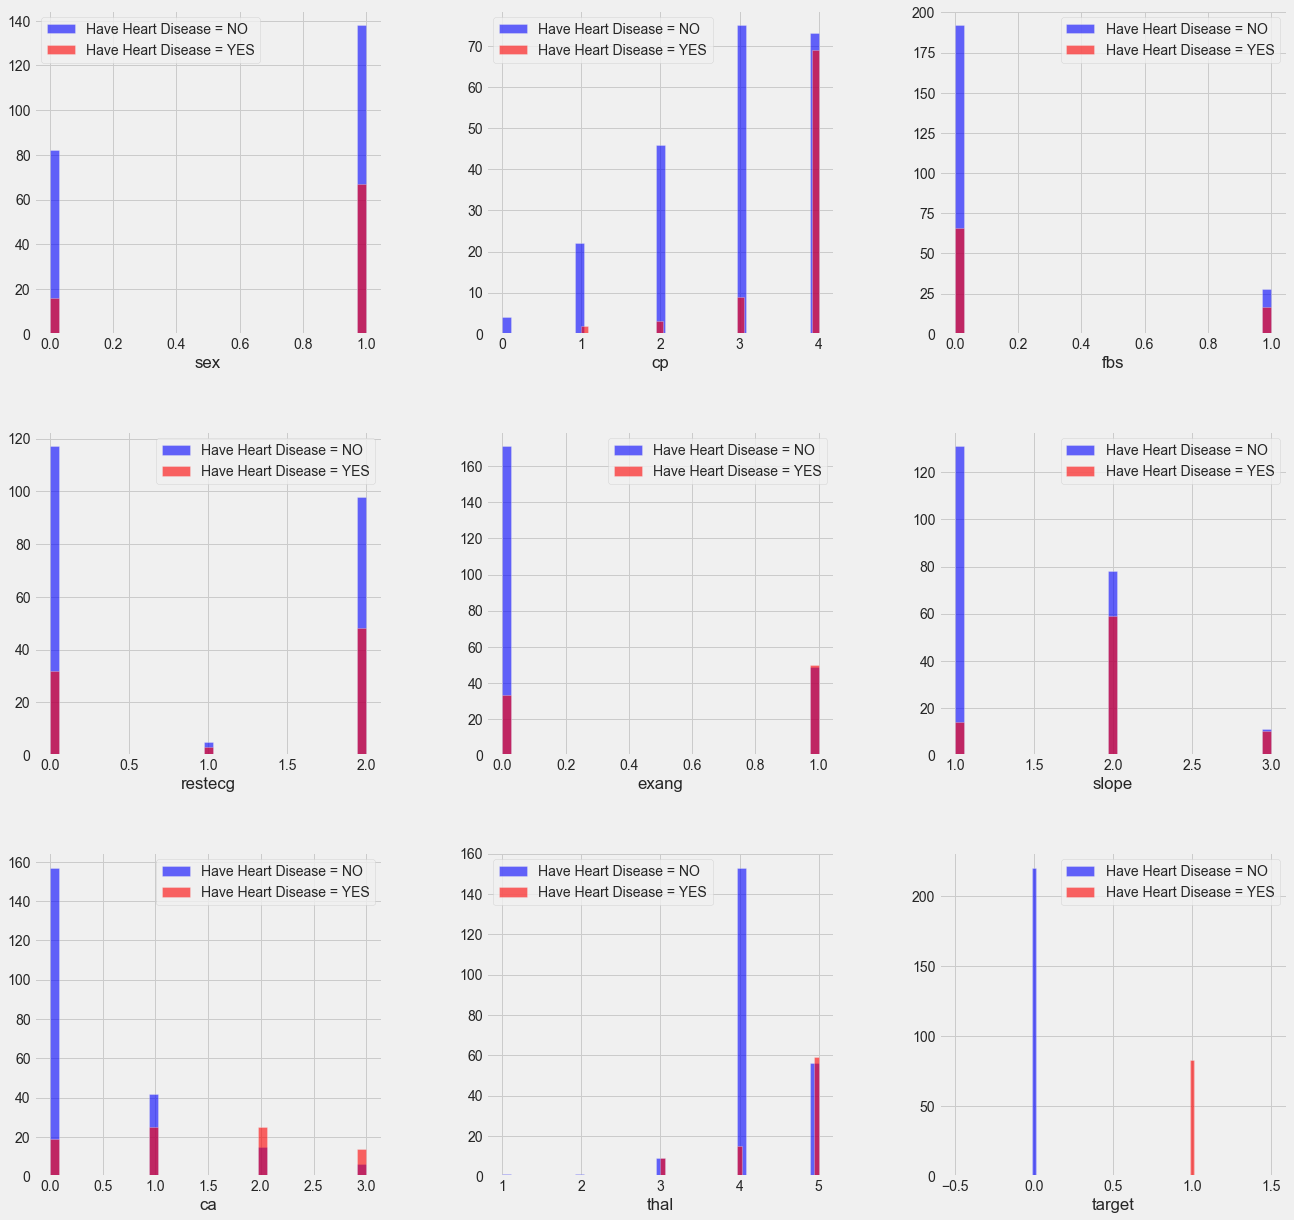

In [31]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)
    
plt.subplots_adjust(wspace=0.3, hspace=0.3)

In these data visualizaiton, we can compare the number of people have or have no heart disease for each variable, for example in cp, we can see the different situaitons for cp equals 0, 1, 2, 3 or 4. We can see that when cp = 4, people are more likely to have heart disease.



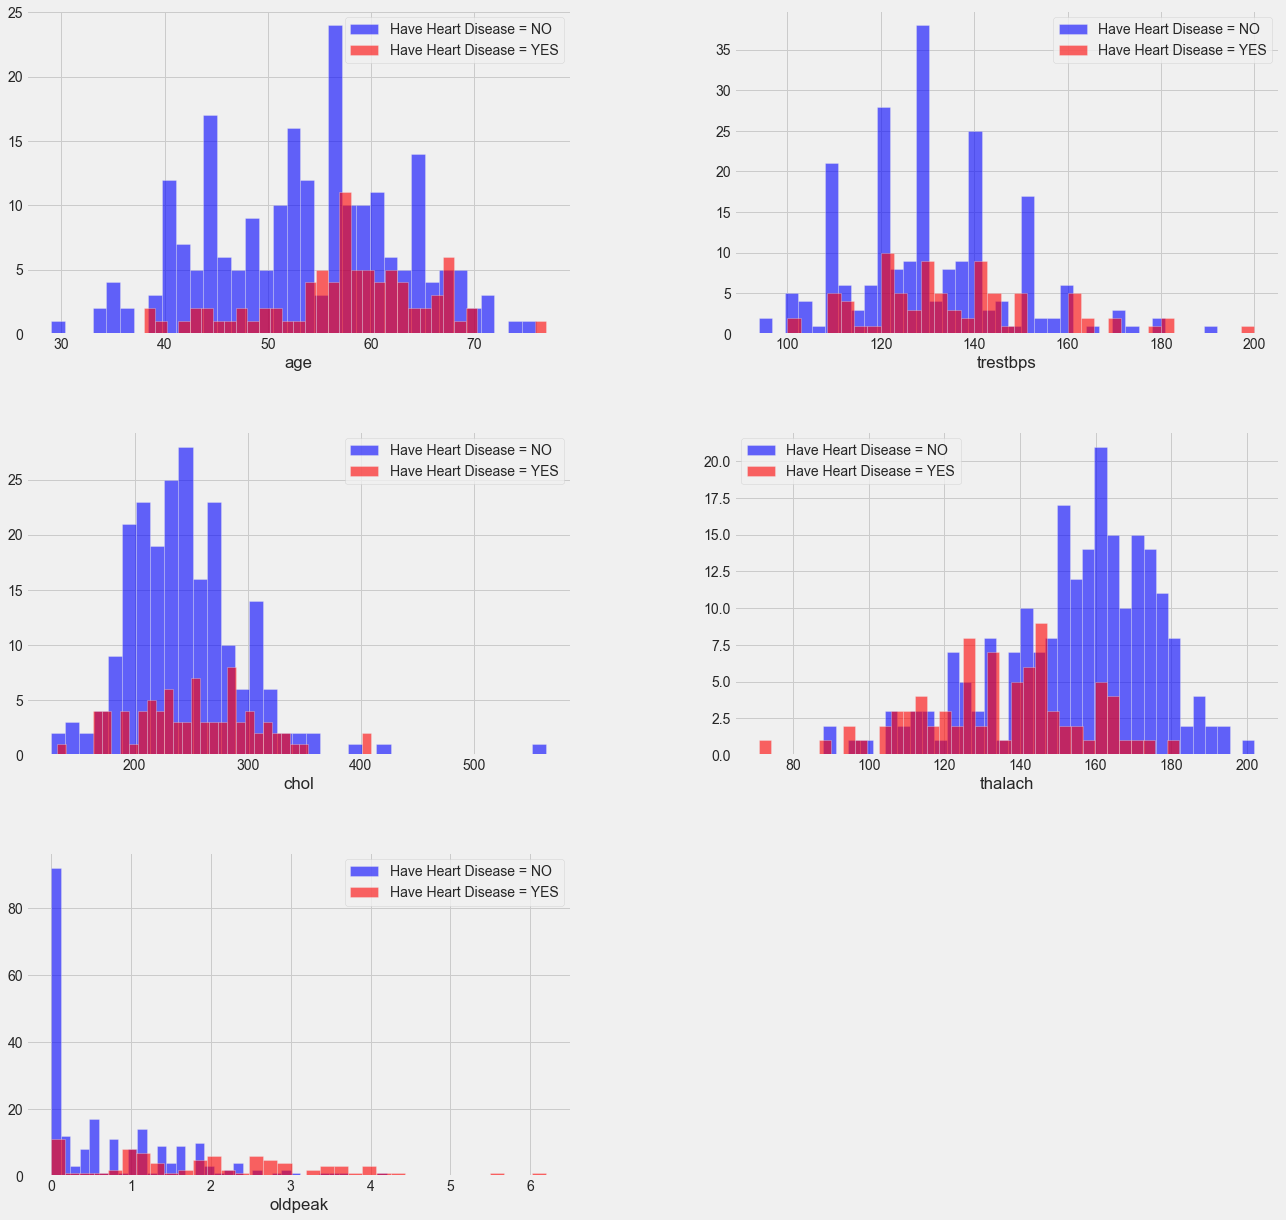

In [32]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)
    
plt.subplots_adjust(wspace=0.3, hspace=0.3)

We can see more clearly in these data visualzation to conclude which range of the variable that people are more likely to have heart disease, for example, people are more likely to have heart disease around age 60.

## 4.Descriptive/Predictive analytics 

In [33]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

In [34]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_3,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3,thal_4,thal_5
0,63,145,233,150,2.3,0,0,1,0,1,...,1,1,0,0,0,0,0,1,0,0
1,67,160,286,108,1.5,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,67,120,229,129,2.6,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,37,130,250,187,3.5,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
4,41,130,204,172,1.4,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [35]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [36]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_3,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3,thal_4,thal_5
0,0.933840,0.745781,-0.260087,0.034808,1.068045,0,0,1,0,1,...,1,1,0,0,0,0,0,1,0,0
1,1.378211,1.592329,0.757388,-1.780616,0.380229,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1.378211,-0.665131,-0.336877,-0.872904,1.325977,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,-1.954574,-0.100766,0.066273,1.634109,2.099771,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
4,-1.510203,-0.100766,-0.816818,0.985744,0.294252,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred):.4f}\n\tRecall Score: {recall_score(y_train, pred):.4f}\n\tF1 score: {f1_score(y_train, pred):.4f}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(X_train))}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        print(f"accuracy score: {accuracy_score(y_test, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred):.4f}\n\tRecall Score: {recall_score(y_test, pred):.4f}\n\tF1 score: {f1_score(y_test, pred):.4f}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [38]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 4.1 logical regression

In [39]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
print_score(log_reg, X_train, y_train, X_test, y_test, train=True)
print_score(log_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.8821

Classification Report: 
 	Precision: 0.7833
	Recall Score: 0.7966
	F1 score: 0.7899

Confusion Matrix: 
 [[140  13]
 [ 12  47]]

Test Result:
accuracy score: 0.8571

Classification Report: 
 	Precision: 0.7619
	Recall Score: 0.6667
	F1 score: 0.7111

Confusion Matrix: 
 [[62  5]
 [ 8 16]]



In logical regression, we can see the accuracy is over 0.85 which means this model can predict the result accurately

## 4.2 random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=1000, random_state=42)
rand_forest.fit(X_train, y_train)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 1.0000

Classification Report: 
 	Precision: 1.0000
	Recall Score: 1.0000
	F1 score: 1.0000

Confusion Matrix: 
 [[153   0]
 [  0  59]]

Test Result:
accuracy score: 0.8132

Classification Report: 
 	Precision: 0.6842
	Recall Score: 0.5417
	F1 score: 0.6047

Confusion Matrix: 
 [[61  6]
 [11 13]]



In [33]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

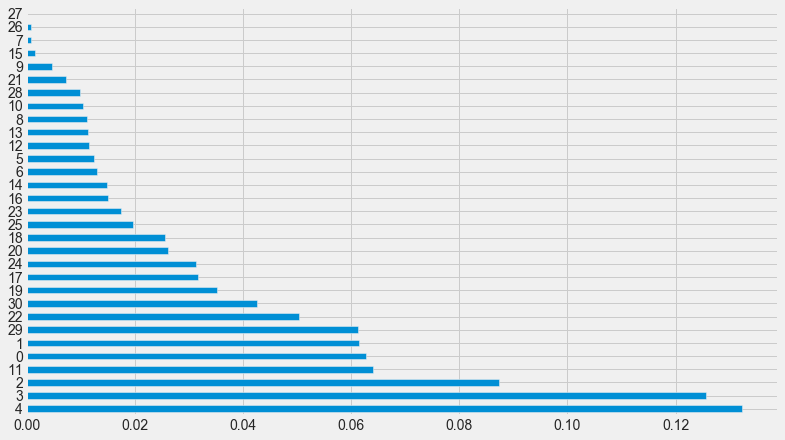

In [34]:
feature_imp(X, rand_forest).plot(kind='barh', figsize=(12,7), legend=False)

In [39]:
print("4:",dataset.columns[4])
print("3:",dataset.columns[3])
print("2:",dataset.columns[2])
print("11:",dataset.columns[11])
print("0:",dataset.columns[0])
print("1:",dataset.columns[1])
print("29:",dataset.columns[29])

4: oldpeak
3: thalach
2: chol
11: cp_3
0: age
1: trestbps
29: thal_3
